In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'

In [8]:
!wget $data

--2023-10-20 15:47:12--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: 'CreditScoring.csv.1'

     0K .......... .......... .......... .......... .......... 28% 1.11M 0s
    50K .......... .......... .......... .......... .......... 56% 1.57M 0s
   100K .......... .......... .......... .......... .......... 84% 2.28M 0s
   150K .......... .......... ........                        100% 7.48M=0.1s

2023-10-20 15:47:13 (1.74 MB/s) - 'CreditScoring.csv.1' saved [182489/182489]



In [344]:
df = pd.read_csv('CreditScoring.csv')

In [345]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [346]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [347]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [348]:
df.columns = df.columns.str.lower()

In [349]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [350]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [351]:
status_values = { 
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

In [352]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [353]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [354]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [355]:
df.income.max()

99999999

In [356]:
for c in ['income', 'assets', 'debt' ]:
    df[c] = df[c].replace(to_replace=99999999, value= np.nan)

In [357]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [358]:
df = df[df.status !='unk'].reset_index(drop=True)

In [359]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [360]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [361]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [362]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [363]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [364]:
del df_train['status']
del df_val['status']
del df_test['status']

In [365]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [366]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [99]:
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [100]:
assess_risk(xi)

'ok'

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [102]:
train_dicts = df_train.fillna(0).to_dict(orient = 'records')

In [103]:
dv = DictVectorizer(sparse = False)
x_train = dv.fit_transform(train_dicts)

In [104]:
x_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [105]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [106]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [107]:
val_dicts = df_val.fillna(0).to_dict(orient = 'records')
x_val = dv.transform(val_dicts)

In [108]:
y_pred = dt.predict_proba(x_train)[:,1]
auc_train = roc_auc_score(y_train, y_pred)
print('train:', auc_train)

y_pred = dt.predict_proba(x_val)[:,1]
auc_val = roc_auc_score(y_val, y_pred)
print('val:', auc_val)

train: 0.7054989859726213
val: 0.6685264343319367


In [109]:
from sklearn.tree import export_text

In [110]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



In [111]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [112]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [113]:
from IPython.display import display

In [114]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [115]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [116]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


In [117]:
dept = [1,2,3,4,5,6,10,15,20, None]

for d in dept:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(x_train, y_train)

    y_pred = dt.predict_proba(x_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s --> %.3f' %(d, auc))


   1 --> 0.606
   2 --> 0.669
   3 --> 0.739
   4 --> 0.761
   5 --> 0.766
   6 --> 0.758
  10 --> 0.686
  15 --> 0.666
  20 --> 0.643
None --> 0.670


In [118]:
scores = []
for d in [4,5,6,7,10,15,20, None]:
    for s in [1,2,5,10,15 ,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(x_train, y_train)

        y_pred = dt.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d,s,auc))
        print('(%4s, %3d) --> %.3f' %(d, s, auc))

(   4,   1) --> 0.761
(   4,   2) --> 0.761
(   4,   5) --> 0.761
(   4,  10) --> 0.761
(   4,  15) --> 0.764
(   4,  20) --> 0.761
(   4, 100) --> 0.756
(   4, 200) --> 0.747
(   4, 500) --> 0.680
(   5,   1) --> 0.767
(   5,   2) --> 0.766
(   5,   5) --> 0.768
(   5,  10) --> 0.762
(   5,  15) --> 0.772
(   5,  20) --> 0.774
(   5, 100) --> 0.763
(   5, 200) --> 0.759
(   5, 500) --> 0.680
(   6,   1) --> 0.749
(   6,   2) --> 0.767
(   6,   5) --> 0.761
(   6,  10) --> 0.778
(   6,  15) --> 0.785
(   6,  20) --> 0.773
(   6, 100) --> 0.776
(   6, 200) --> 0.768
(   6, 500) --> 0.680
(   7,   1) --> 0.746
(   7,   2) --> 0.750
(   7,   5) --> 0.759
(   7,  10) --> 0.764
(   7,  15) --> 0.780
(   7,  20) --> 0.779
(   7, 100) --> 0.780
(   7, 200) --> 0.768
(   7, 500) --> 0.680
(  10,   1) --> 0.690
(  10,   2) --> 0.710
(  10,   5) --> 0.731
(  10,  10) --> 0.770
(  10,  15) --> 0.790
(  10,  20) --> 0.786
(  10, 100) --> 0.780
(  10, 200) --> 0.768
(  10, 500) --> 0.680
(  15,   1

In [119]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.761283
1,4.0,2,0.761283
2,4.0,5,0.761283
3,4.0,10,0.761283
4,4.0,15,0.763726


In [120]:
df_scores.sort_values(by= 'auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
40,10.0,15,0.790202
58,20.0,15,0.788353
67,NaN,15,0.787505
49,15.0,15,0.785822
41,10.0,20,0.785525


In [121]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.665  0.761  0.767  0.749  0.746  0.690  0.658  0.670
2                 0.695  0.761  0.766  0.767  0.750  0.710  0.674  0.692
5                 0.715  0.761  0.768  0.761  0.759  0.731  0.717  0.710
10                0.761  0.761  0.762  0.778  0.764  0.770  0.760  0.762
15                0.788  0.764  0.772  0.785  0.780  0.790  0.786  0.788
20                0.781  0.761  0.774  0.773  0.779  0.786  0.781  0.783
100               0.779  0.756  0.763  0.776  0.780  0.780  0.779  0.780
200               0.768  0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

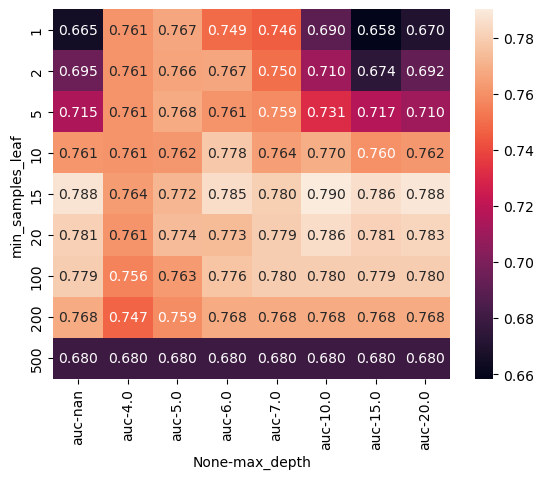

In [122]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [123]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [126]:
y_pred = rf.predict_proba(x_val)[:,1]

In [127]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [128]:
scores=[]

for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(x_train, y_train)

    y_pred = rf.predict_proba(x_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [129]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])

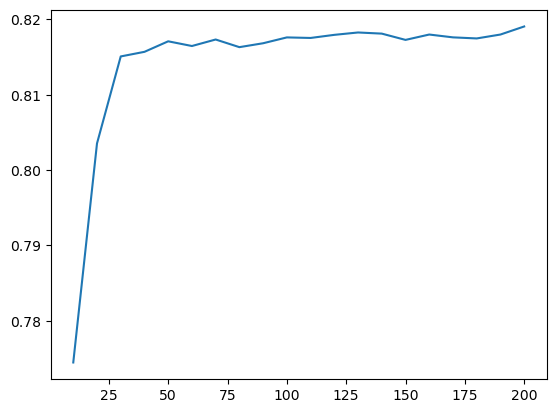

In [130]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [131]:
scores=[]

for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(x_train, y_train)
    
        y_pred = rf.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [132]:
scores

[(5, 10, 0.7876988932212832),
 (5, 20, 0.7977313458138577),
 (5, 30, 0.8003045457847957),
 (5, 40, 0.7997081688503548),
 (5, 50, 0.7998776973190285),
 (5, 60, 0.8011673245985809),
 (5, 70, 0.8022510958804582),
 (5, 80, 0.803244048339832),
 (5, 90, 0.8036164055120971),
 (5, 100, 0.8044519386791311),
 (5, 110, 0.8066255358310528),
 (5, 120, 0.8064499527742124),
 (5, 130, 0.8080544186384443),
 (5, 140, 0.807019084061902),
 (5, 150, 0.8072188854714104),
 (5, 160, 0.8071341212370734),
 (5, 170, 0.8069645927683999),
 (5, 180, 0.8072612675885785),
 (5, 190, 0.8072309946477441),
 (5, 200, 0.8073520864110824),
 (10, 10, 0.7913649463563488),
 (10, 20, 0.8084964035746288),
 (10, 30, 0.8115842435397544),
 (10, 40, 0.8178386331161753),
 (10, 50, 0.8170575912426437),
 (10, 60, 0.8186560025187086),
 (10, 70, 0.8202301954421061),
 (10, 80, 0.8204118330871135),
 (10, 90, 0.8198427017994235),
 (10, 100, 0.8211686566079774),
 (10, 110, 0.8226459761207041),
 (10, 120, 0.8232272165847279),
 (10, 130, 0.824

In [133]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'n_estimators', 'auc'])

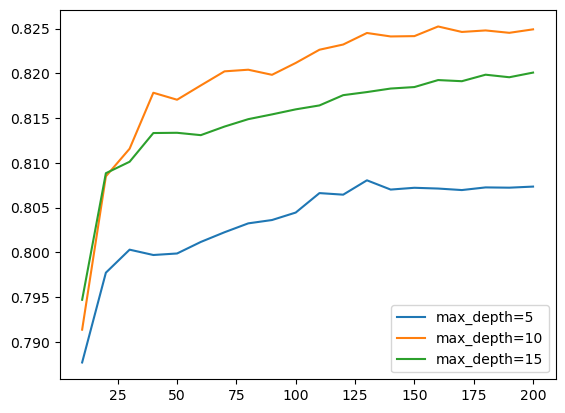

In [134]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%s'%d)
plt.legend()

In [135]:
max_depth = 10

In [136]:
scores=[]

for s in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth,min_samples_leaf = s, random_state=1)
        rf.fit(x_train, y_train)
    
        y_pred = rf.predict_proba(x_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

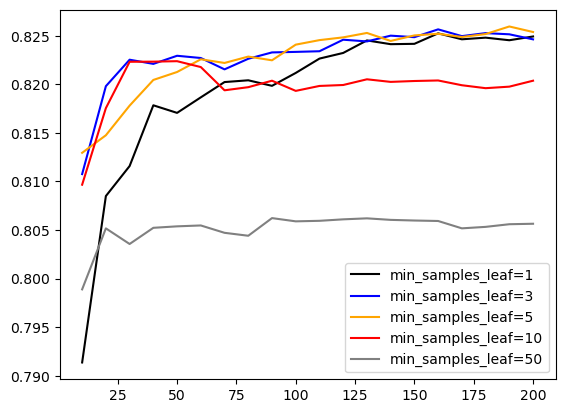

In [137]:
df_scores = pd.DataFrame(scores, columns = ['min_samples_leaf', 'n_estimators', 'auc'])
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, color=col, label='min_samples_leaf=%d'%s)
plt.legend()

In [138]:
min_samples_leaf = 5

In [139]:
rf = RandomForestClassifier(n_estimators=125, max_depth=max_depth, min_samples_leaf = min_samples_leaf, random_state=1, n_jobs=-1 )
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=125,
                       n_jobs=-1, random_state=1)

In [140]:
y_pred = rf.predict_proba(x_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8253584316194813

In [141]:
!pip install xgboost

In [142]:
import xgboost as xgb

In [453]:
features = dv.get_feature_names_out()
feature_names = list(features)
feature_names
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=feature_names)
dval = xgb.DMatrix(x_val, label=y_val, feature_names=feature_names)

In [144]:
xgb_params= {
    'eta':0.3,
    'max_depth': 6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':8,
    'seed':1,
    'verbosity':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [145]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [147]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [192]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [193]:
# s = output.stdout
# line = s.strip().split('\n')
# line

In [194]:
int(num_iter.strip('[]'))

0

In [204]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        num_iter, train_line, val_line = line.split('\t')

        it = int(num_iter.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
        
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [205]:
df_score = parse_xgb_output(output)

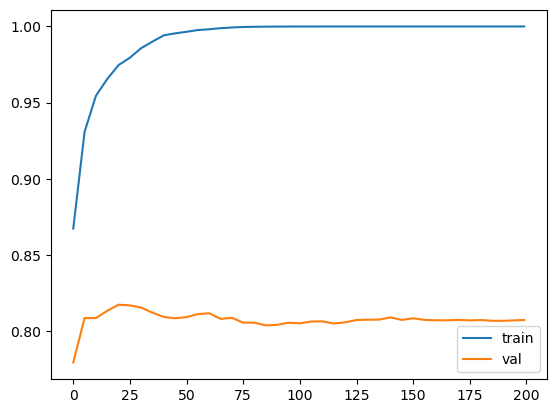

In [251]:
plt.plot(df_score.num_iter, df_score.train_auc, label = 'train')
plt.plot(df_score.num_iter, df_score.val_auc, label = 'val')
plt.legend()

In [ ]:
scores = {}

In [272]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [273]:
key = 'eta=%s' %(xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [274]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

In [295]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1', 'eta=0.05', 'eta=0.01']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label = eta)
plt.legend()

KeyError: 'eta=1.0'

In [313]:
scores = {}

In [303]:

%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [304]:
key = 'max_depth=%s' %(xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

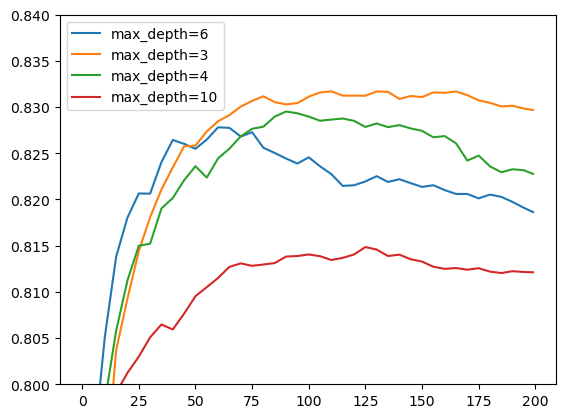

In [307]:

for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend()

In [319]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [320]:
key = 'min_child_weight=%s' %(xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

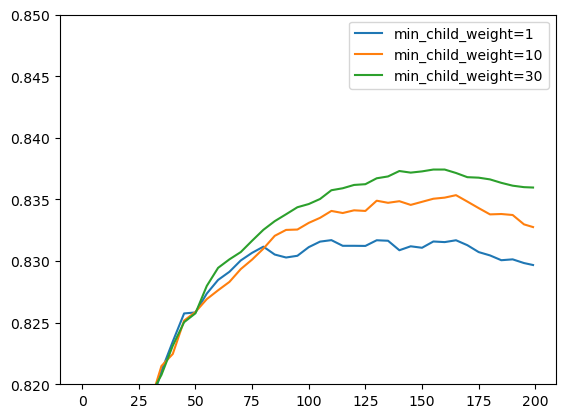

In [322]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.85)
plt.legend()

In [323]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)

In [324]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8373465161899687

In [326]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [328]:
y_pred = dt.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7856948245380349

In [330]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [332]:
y_pred = rf.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [333]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)

In [334]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8373465161899687

In [367]:
df_full_train = df_full_train.reset_index(drop=True)

In [368]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [369]:
del df_full_train['status']

In [370]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [375]:
feature_names=list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [445]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=125)

In [446]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8235301304921557